In [1]:
import pickle 
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
from datetime import datetime
import matplotlib.pyplot as plt 

In [2]:
def get_df_dengue_chik(city):
    df_dengue = pd.read_csv(f'../data/dengue_{city}_cluster.csv', index_col = 'Unnamed: 0' )
    df_dengue.index = pd.to_datetime(df_dengue.index)
    
    df_chik = pd.read_csv(f'../data/chik_{city}_cluster.csv', index_col = 'Unnamed: 0' )
    df_chik.index = pd.to_datetime(df_chik.index)
    
    return df_dengue, df_chik 

In [3]:
def plot_incidence():
    
    fig, axs = plt.subplots(2, 2, figsize=(16,12))
    
    city = 2611606
    
    city_name = 'Recife'
    
    df_dengue, df_chik = get_df_dengue_chik(city)
    
    axs[0, 0].plot(df_dengue[f'casos_est_{city}'], label = 'dengue')
    
    axs[0, 0].plot(df_chik[f'casos_est_{city}'], label = 'chik')
    
    axs[0, 0].set_xlabel('date')
    
    axs[0, 0].grid()
    
    axs[0, 0].legend()
    
    axs[0, 0].set_title(city_name)
    
    city = 2507507
    
    city_name = 'João Pessoa'
    
    df_dengue, df_chik = get_df_dengue_chik(city)
    
    axs[0, 1].plot(df_dengue[f'casos_est_{city}'], label = 'dengue')
    
    axs[0, 1].plot(df_chik[f'casos_est_{city}'], label = 'chik')
    
    axs[0, 1].set_xlabel('date')
    
    axs[0, 1].grid()
    
    axs[0, 1].legend()
    
    axs[0, 1].set_title(city_name)
    
    city = 2304400
    
    city_name = 'Fortaleza'
    
    df_dengue, df_chik = get_df_dengue_chik(city)
    
    axs[1, 0].plot(df_dengue[f'casos_est_{city}'], label = 'dengue')
    
    axs[1, 0].plot(df_chik[f'casos_est_{city}'], label = 'chik')
    
    axs[1, 0].set_xlabel('date')
    
    axs[1, 0].grid()
    
    axs[1, 0].legend()
    
    axs[1, 0].set_title(city_name)
    
    city = 3304557
    
    city_name = 'Rio de Janeiro'
    
    df_dengue, df_chik = get_df_dengue_chik(city)
    
    axs[1, 1].plot(df_dengue[f'casos_est_{city}'], label = 'dengue')
    
    axs[1, 1].plot(df_chik[f'casos_est_{city}'], label = 'chik')
    
    axs[1, 1].set_xlabel('date')
    
    axs[1, 1].grid()
    
    axs[1, 1].legend()
    
    axs[1, 1].set_title(city_name)
    
    plt.savefig(f'../figures/incidence.png',bbox_inches='tight',  dpi = 300)
    
    plt.show()

    return 
    
    

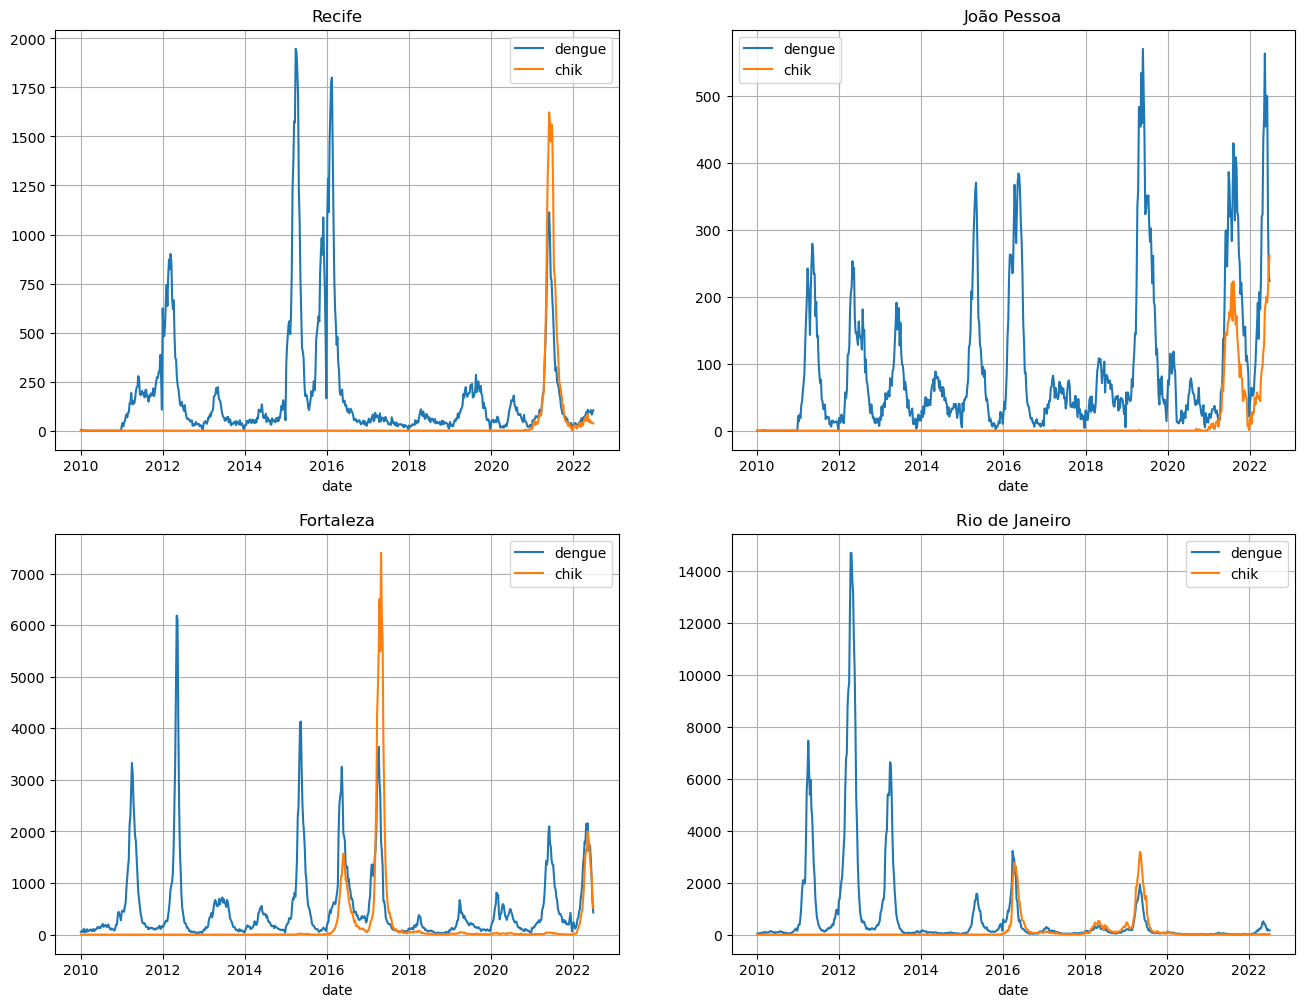

In [4]:
plot_incidence()

In [5]:
def annotate_axes(ax,text):
    ax.set_xlabel(text)


In [6]:
def plot_dengue_test_lstm(ax, city, doenca, label, title):
    
    data_lstm = pickle.load(open(f'../predictions/lstm/lstm_{city}_{doenca}_{label}.pkl', 'rb'))
    
    pred_window = 4
    Ydata = data_lstm['target'] 
    indice = data_lstm['indice']
    factor = data_lstm['factor'] 
    split_point = len(data_lstm['xdata'] )

    df_predicted = data_lstm['pred'] 
    df_predicted25 = data_lstm['lb']
    df_predicted975 = data_lstm['ub']
        
    ax.plot(indice[split_point + len(indice)-Ydata.shape[0]:], Ydata[split_point:, -1] * factor, 'k-', alpha=0.7, label='data')
    ax.plot(indice[split_point+ len(indice)-Ydata.shape[0]:], df_predicted.iloc[split_point:,-1] * factor, 'r-', alpha=0.5, label='median')
    

    ax.fill_between(indice[split_point + 7:], df_predicted25[df_predicted25.columns[-1]][split_point:] * factor,
                       df_predicted975[df_predicted975.columns[-1]][split_point:] * factor,
                       color='b', alpha=0.3)

    ax.grid()
    ax.legend()
    ax.set_title(title)
    ax.set_xlabel("time")
    ax.set_ylabel("incidence")
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    
    return 

In [7]:
def plot_dengue_bi_lstm():
    
    fig, axd = plt.subplot_mosaic([['a', 'b'],
                                  ['c', 'd'],
                                  ['e', 'f'],
                                  ['g', 'h']],
                              figsize=(12, 18), layout="constrained")
    
    # recife
    city = 2611606
    plot_dengue_test_lstm(axd['a'], city, doenca = 'dengue', label = 'msle', title = 'Recife - MSLE')
    plot_dengue_test_lstm(axd['b'], city, doenca = 'dengue', label = 'custom_msle', title = 'Recife - Custom MSLE')

    # joao pessoa
    city = 2507507
    plot_dengue_test_lstm(axd['c'], city, doenca = 'dengue', label = 'msle', title = 'João Pessoa - MSLE')
    plot_dengue_test_lstm(axd['d'], city, doenca = 'dengue', label = 'custom_msle', title = 'João Pessoa - Custom MSLE')

    # fortaleza
    city = 2304400
    plot_dengue_test_lstm(axd['e'], city, doenca = 'dengue', label = 'msle', title = 'Fortaleza - MSLE')
    plot_dengue_test_lstm(axd['f'], city, doenca = 'dengue', label = 'custom_msle', title = 'Fortaleza - Custom MSLE')
    
    # Rio de Janeiro
    city = 3304557
    plot_dengue_test_lstm(axd['g'], city, doenca = 'dengue', label = 'msle', title = 'Rio de Janeiro - MSLE')
    plot_dengue_test_lstm(axd['h'], city, doenca = 'dengue', label = 'custom_msle', title = 'Rio de Janeiro - Custom MSLE')
    
    fig.savefig(f'../figures/dengue_bi_lstm.png',bbox_inches='tight', format = 'png', dpi = 300)
    
    plt.show()
    

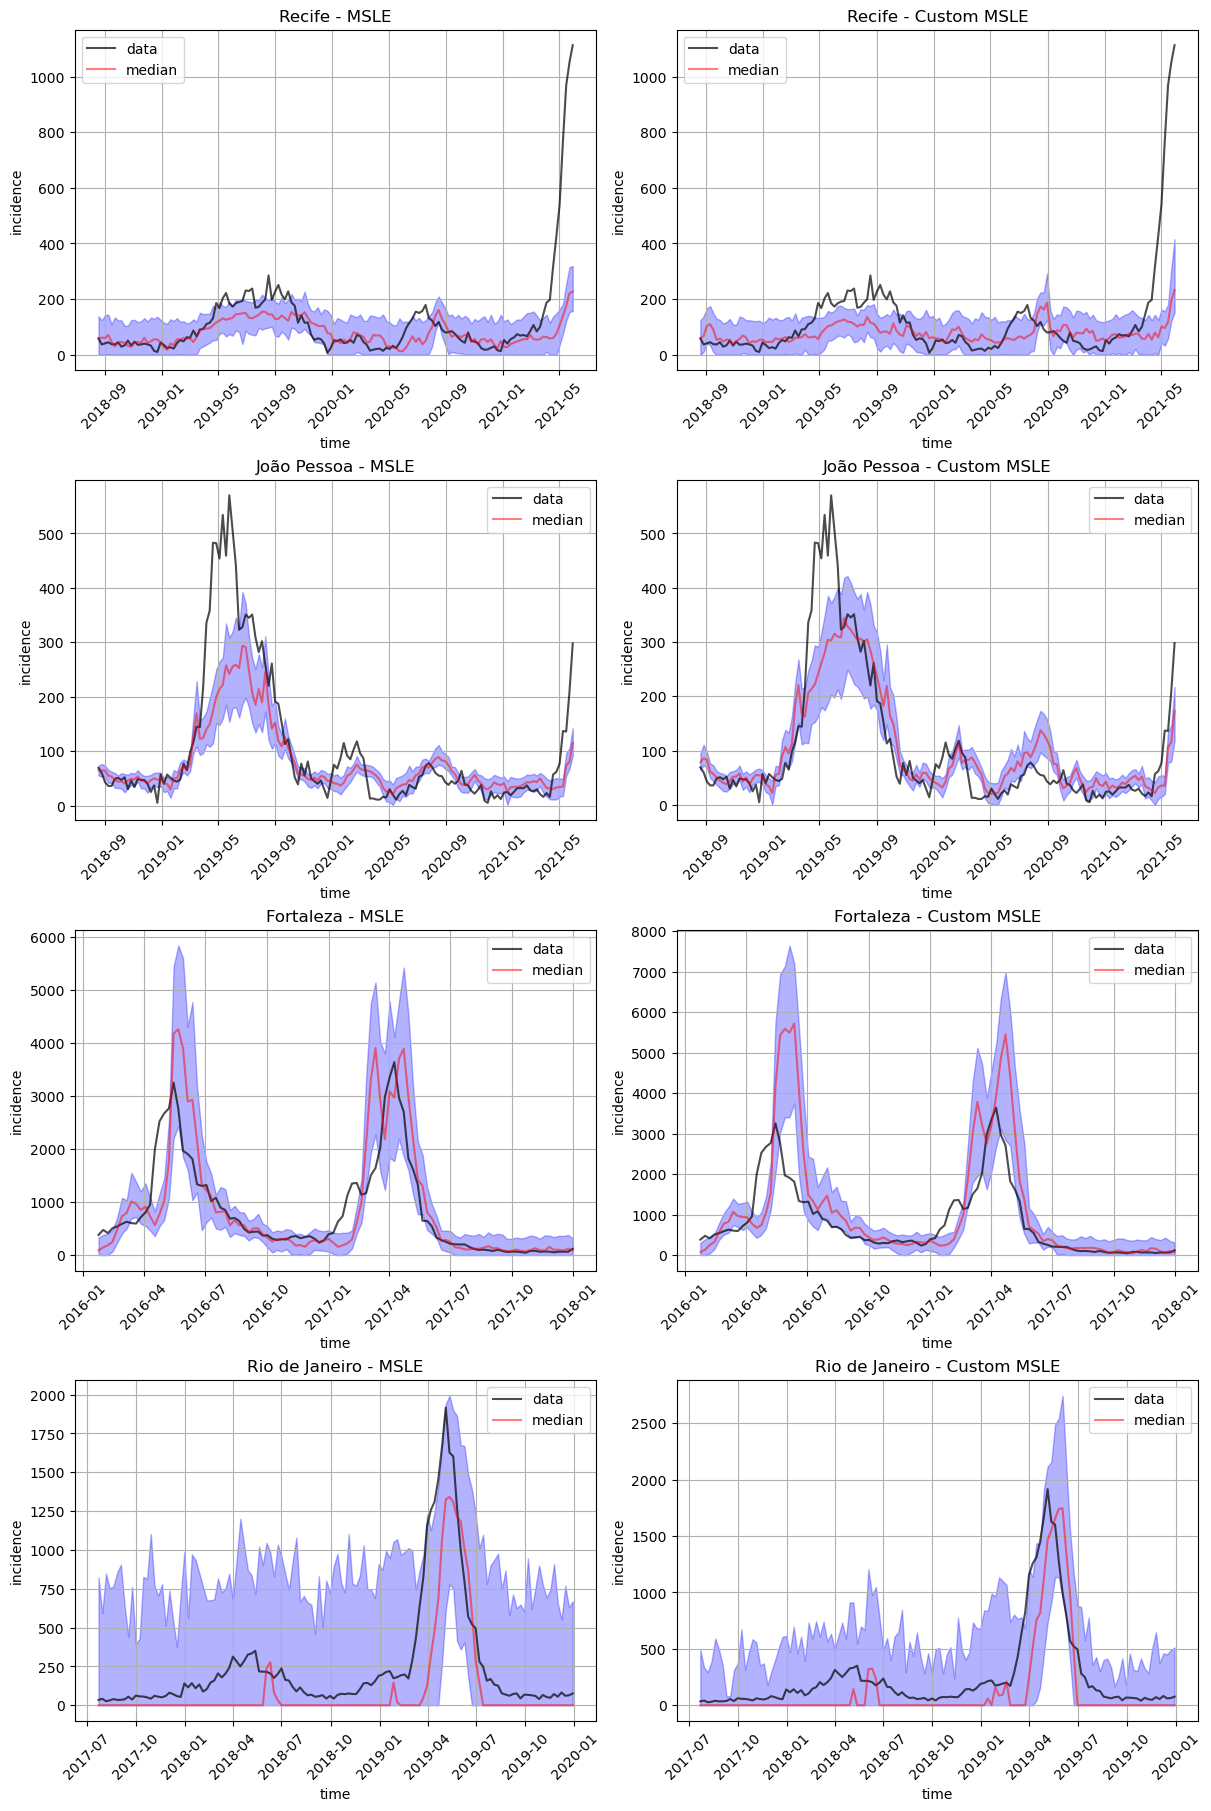

In [8]:
plot_dengue_bi_lstm()

In [9]:
def plot_pred_test_chik(ax, city, doenca, title):
    
    data_pgbm = pickle.load(open(f'../predictions/pgbm/pgbm_{city}_{doenca}_train_test_predictions.pkl', 'rb'))
    
    ydata = data_pgbm['target'] 
    split_point = data_pgbm['train_size']
    
    ax.plot(ydata[split_point + 4:], 'k-', label='data')

    pred_window = 4
    
    x = data_pgbm['dates'][split_point:]
    y = data_pgbm['preds'][split_point:]
    y25 = data_pgbm['preds25'][split_point:]
    y975 = data_pgbm['preds975'][split_point:]

    ax.plot(x, y, 'r-', alpha=0.5, label='median')
    ax.fill_between(x, np.array(y25), np.array(y975), color='b', alpha=0.3)

    ax.grid()
    ax.legend()
    ax.set_title(title)
    ax.set_xlabel("time")
    ax.set_ylabel("incidence")
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
    return


In [10]:
def plot_dengue_pgbm():
    doenca = 'dengue'
    
    fig, axd = plt.subplot_mosaic([['a', 'b'],
                                  ['c', 'd']],
                              figsize=(12, 9), layout="constrained")
    
    # recife
    city = 2611606
    plot_pred_test_chik(axd['a'], city, doenca, title = 'Recife')
    
    # joao pessoa
    city = 2507507
    plot_pred_test_chik(axd['b'], city, doenca, title = 'João Pessoa')
    
    # fortaleza
    city = 2304400
    plot_pred_test_chik(axd['c'], city, doenca, title = 'Fortaleza')
    
    # Rio de Janeiro
    city = 3304557
    plot_pred_test_chik(axd['d'], city, doenca, title = 'Rio de Janeiro')
    
    fig.savefig(f'../figures/dengue_pgbm.png',bbox_inches='tight', format = 'png', dpi = 300)
    
    plt.show()

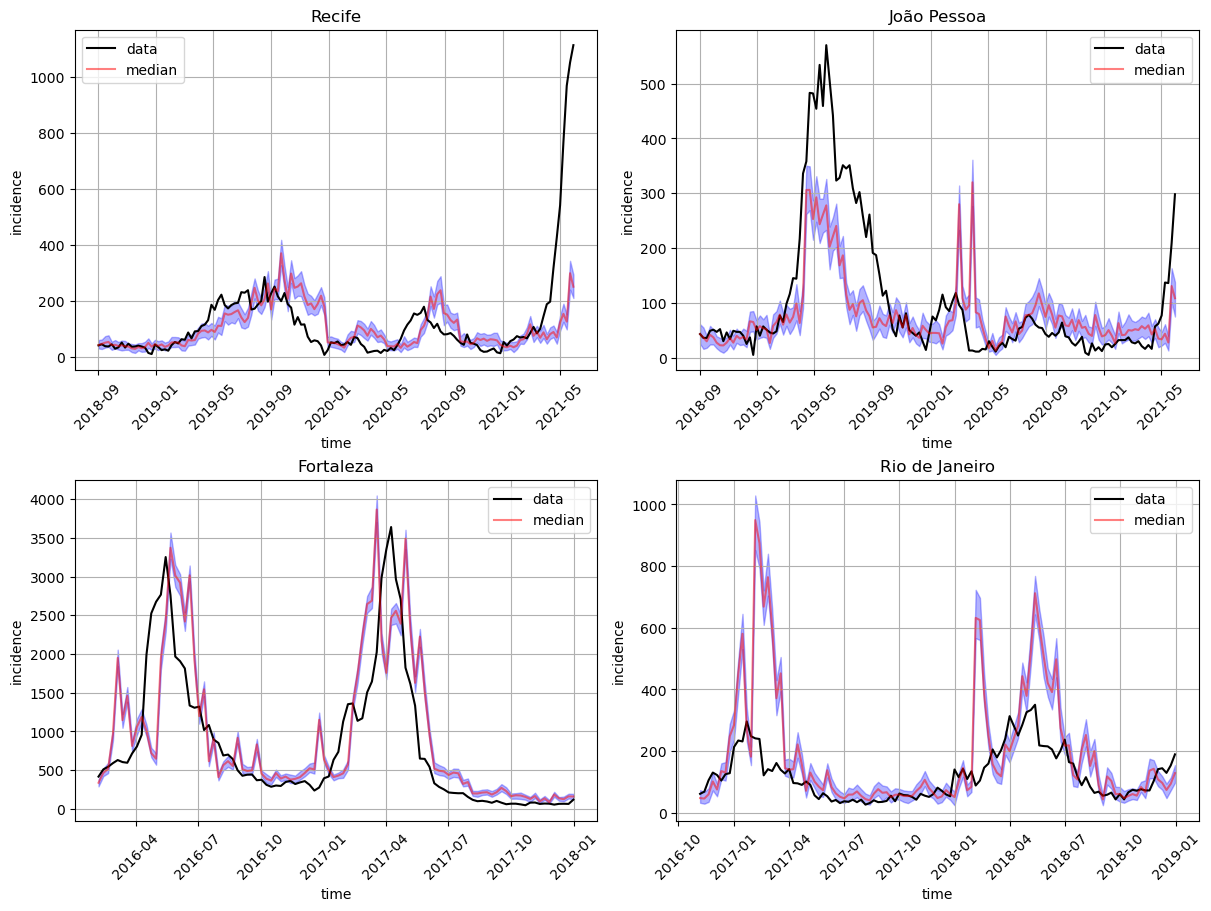

In [11]:
plot_dengue_pgbm()

In [12]:
def plot_cross_preds_chik(ax, city, title):
    
    data_pgbm = pickle.load(open(f'../predictions/pgbm/pgbm_{city}_chik_cross_predictions.pkl', 'rb'))
    
    ydata = data_pgbm['target'] 
        
    ax.plot(ydata[4:], 'k-', label='data')

    pred_window = 4
    
    x = data_pgbm['dates']
    y = data_pgbm['preds']
    y25 = data_pgbm['preds25']
    y975 = data_pgbm['preds975']
    ax.plot(x, y, 'r-', alpha=0.5, label='median')
    ax.fill_between(x, np.array(y25), np.array(y975), color='b', alpha=0.3)

    ax.grid()
    ax.legend()
    ax.set_title(title)
    ax.set_xlabel("time")
    ax.set_ylabel("incidence")
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    return

In [13]:
def plot_pgbm_cross_chik():
    fig, axd = plt.subplot_mosaic([['a', 'b'],
                                  ['c', 'd']],
                              figsize=(12, 9), layout="constrained")
    
    # recife
    city = 2611606
    plot_cross_preds_chik(axd['a'], city, title = 'Recife')
    
    # joao pessoa
    city = 2507507
    plot_cross_preds_chik(axd['b'], city, title = 'João Pessoa')
    
    # fortaleza
    city = 2304400
    plot_cross_preds_chik(axd['c'], city, title = 'Fortaleza')
    
    # Rio de Janeiro
    city = 3304557
    plot_cross_preds_chik(axd['d'], city, title = 'Rio de Janeiro')
    
    fig.savefig(f'../figures/pgbm_cross_chik.png',bbox_inches='tight', format = 'png', dpi = 300)
    
    plt.show()

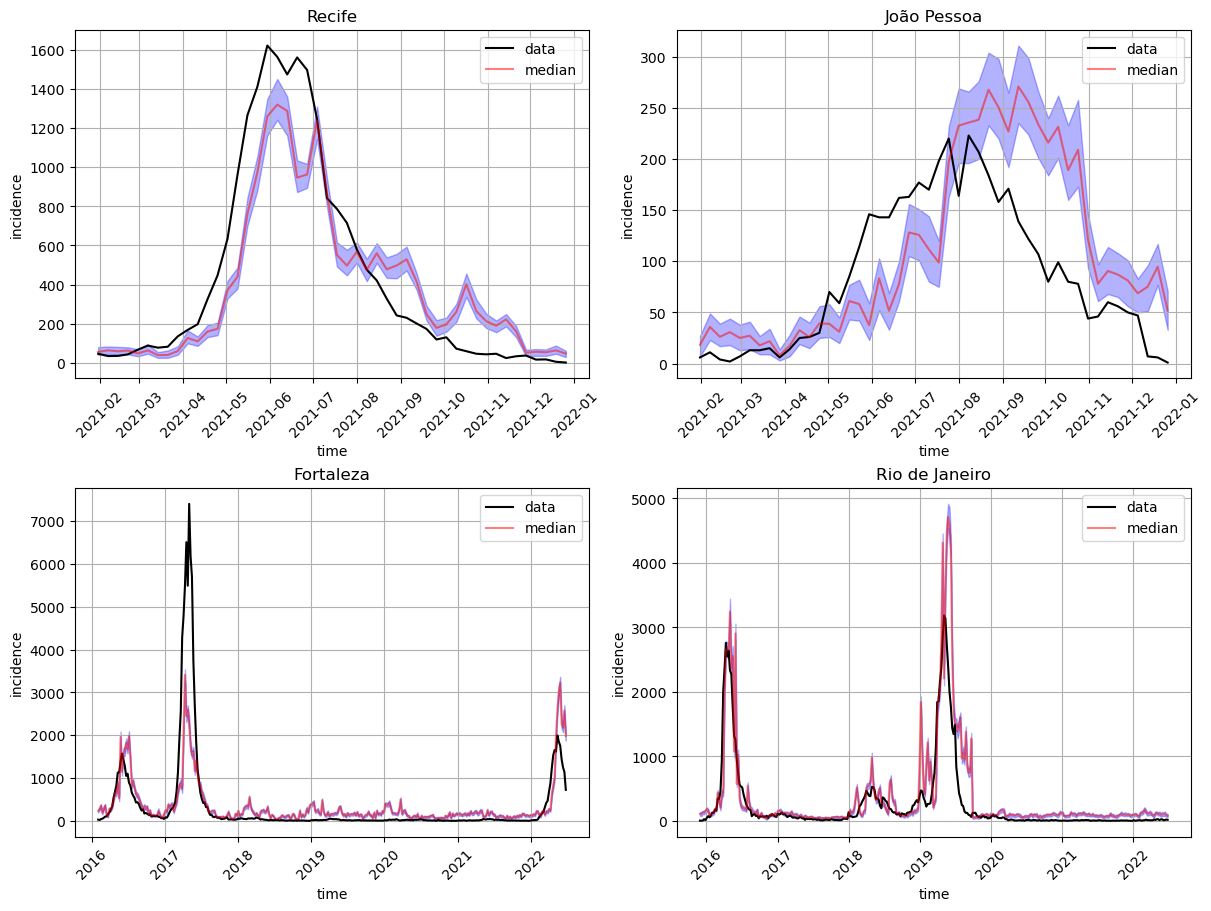

In [14]:
plot_pgbm_cross_chik()

In [15]:
def plot_cross_chik_lstm(ax, city, title):
    
    label_m = 'custom_msle_all'
    data_lstm = pickle.load(open(f'../predictions/lstm/lstm_{city}_chik_predictions_{label_m}.pkl', 'rb'))
    
    data_transfer = pickle.load(open(f'../predictions/lstm/tl_{city}_transf_custom_msle.pkl', 'rb'))
    split_point = data_transfer['train_size'] 
    
    pred_window = 4
    Ydata = data_lstm['target'] 
    indice = data_lstm['indice']
    factor = data_lstm['factor'] 
  
    df_predicted = data_lstm['pred'] 
    df_predicted25 = data_lstm['lb']
    df_predicted975 = data_lstm['ub']
        
    ax.plot(indice[split_point + len(indice)-Ydata.shape[0]:], Ydata[split_point:, -1] * factor, 'k-', alpha=0.7, label='data')
    ax.plot(indice[split_point+ len(indice)-Ydata.shape[0]:], df_predicted.iloc[split_point:,-1] * factor, 'r-', alpha=0.5, label='median')
    

    ax.fill_between(indice[split_point + 7:], df_predicted25[df_predicted25.columns[-1]][split_point:] * factor,
                       df_predicted975[df_predicted975.columns[-1]][split_point:] * factor,
                       color='b', alpha=0.3)
    ax.grid()
    ax.legend()
    ax.set_title(title)
    ax.set_xlabel("time")
    ax.set_ylabel("incidence")
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
    return 

def plot_transf_chik_lstm(ax,city, title):
    
    label = 'transf_custom_msle'

    data_lstm = pickle.load(open(f'../predictions/lstm/tl_{city}_{label}.pkl', 'rb'))
    
    pred_window = 4
    Ydata = data_lstm['target'] 
    indice = data_lstm['indice']
    factor = data_lstm['factor'] 
    split_point = data_lstm['train_size'] 
  
    df_predicted = data_lstm['pred'] 
    df_predicted25 = data_lstm['pred25']
    df_predicted975 = data_lstm['pred975']
    
    ax.plot(indice[split_point + len(indice)-Ydata.shape[0]:], Ydata[split_point:, -1] * factor, 'k-', alpha=0.7, label='data')
    ax.plot(indice[split_point+ len(indice)-Ydata.shape[0]:], df_predicted.iloc[split_point:,-1] * factor, 'r-', alpha=0.5, label='median')
    

    ax.fill_between(indice[split_point + 7:], df_predicted25[df_predicted25.columns[-1]][split_point:] * factor,
                       df_predicted975[df_predicted975.columns[-1]][split_point:] * factor,
                       color='b', alpha=0.3)

    ax.grid()
    ax.legend()
    ax.set_title(title)
    ax.set_xlabel("time")
    ax.set_ylabel("incidence")
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
    return 

In [16]:
def plot_chik_bi_lstm():
    
    fig, axd = plt.subplot_mosaic([['a', 'b'],
                                  ['c', 'd'],
                                  ['e', 'f'],
                                  ['g', 'h']],
                              figsize=(12, 18), layout="constrained")
    
    # recife
    city = 2611606
    plot_transf_chik_lstm(axd['a'], city, title = 'Recife (with transfer learning)')
    plot_cross_chik_lstm(axd['b'], city, title = 'Recife (no transfer learning)')

    # joao pessoa
    city = 2507507
    plot_transf_chik_lstm(axd['c'], city, title = 'João Pessoa (with transfer learning)')
    plot_cross_chik_lstm(axd['d'], city, title = 'João Pessoa (no transfer learning)')

    # fortaleza
    city = 2304400
    plot_transf_chik_lstm(axd['e'], city, title = 'Fortaleza (with transfer learning)')
    plot_cross_chik_lstm(axd['f'], city, title = 'Fortaleza (no transfer learning)')

    # Rio de Janeiro
    city = 3304557
    plot_transf_chik_lstm(axd['g'], city, title = 'Rio de Janeiro (with transfer learning)')
    plot_cross_chik_lstm(axd['h'], city, title = 'Rio de Janeiro (no transfer learning)')

    fig.savefig(f'../figures/chik_bi_lstm.png',bbox_inches='tight', format = 'png', dpi = 300)
    
    plt.show()
    

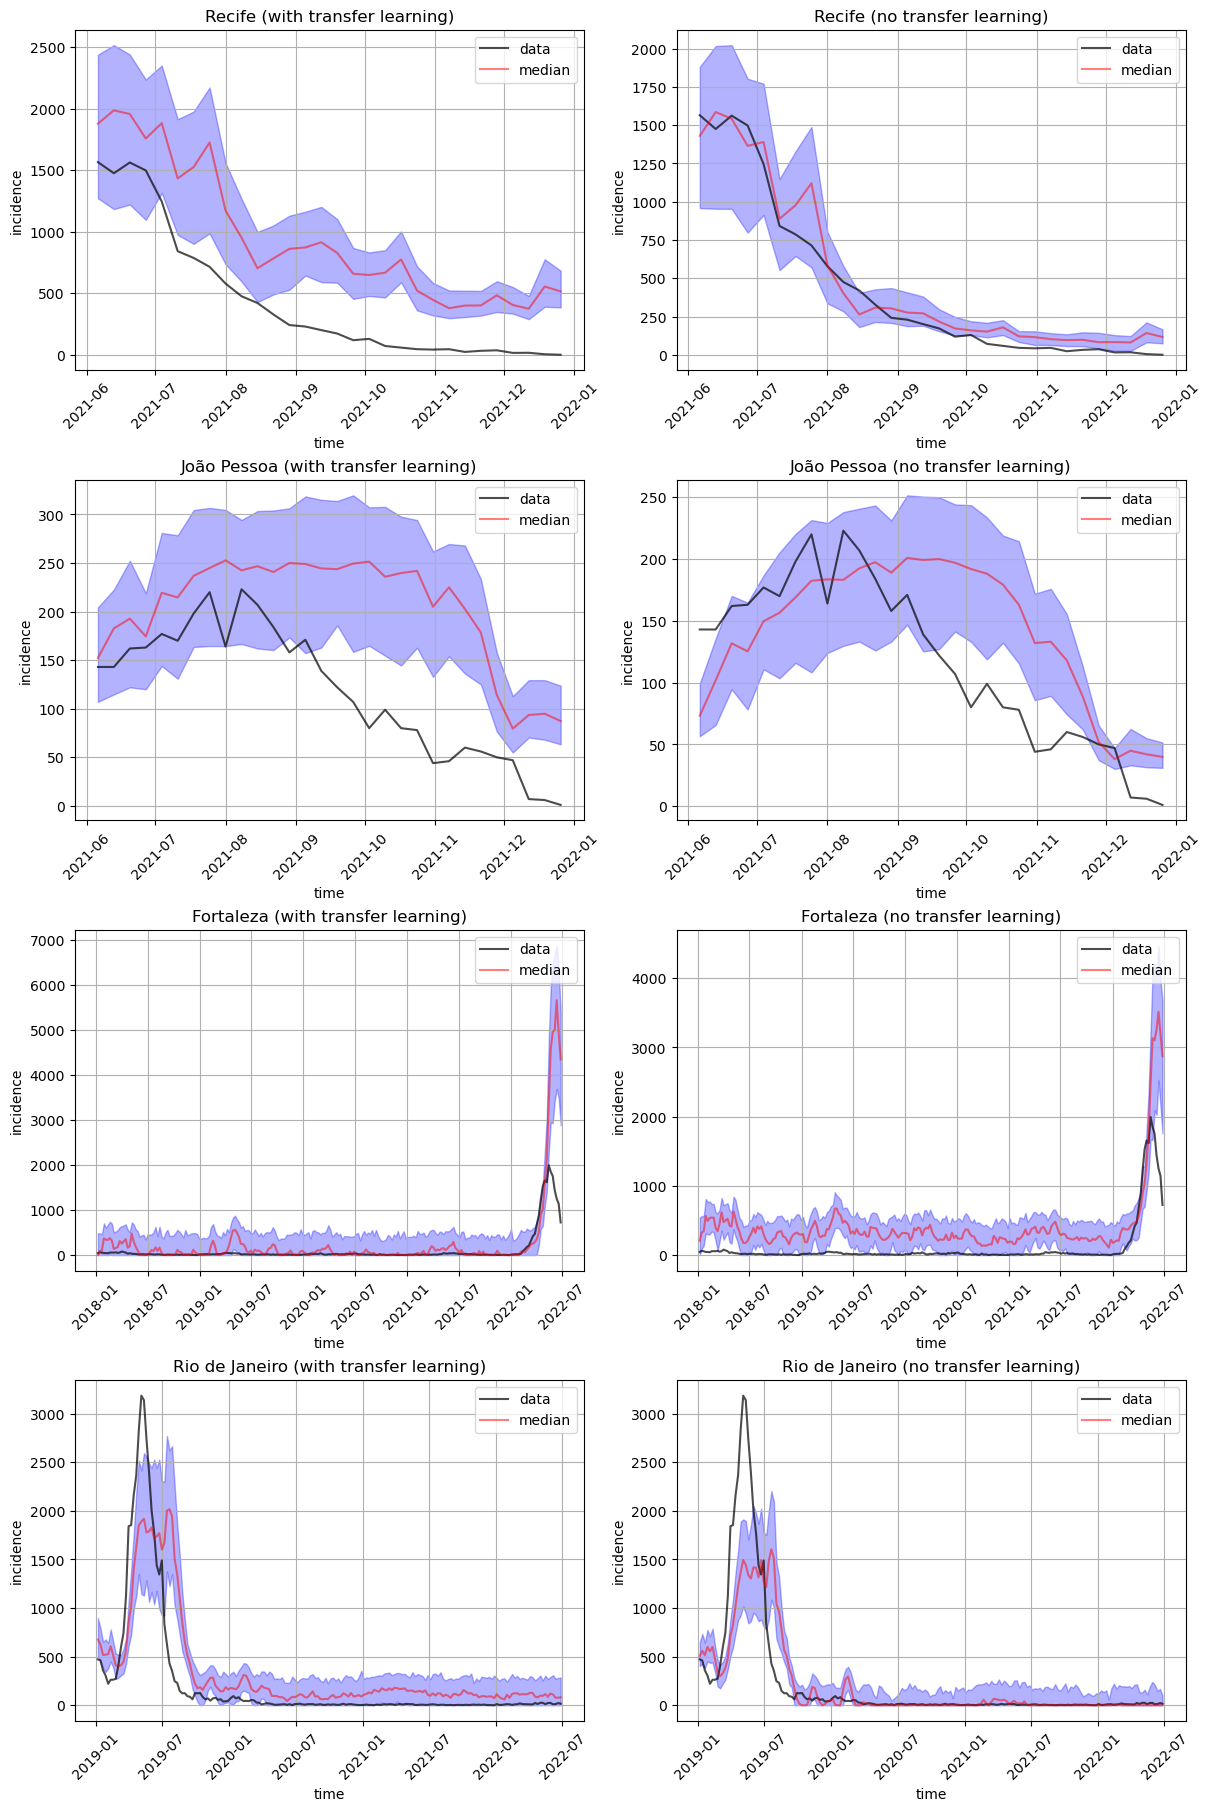

In [17]:
plot_chik_bi_lstm()

In [18]:

def plot_cross_qq(ax, q_o, q_p):
    sns.kdeplot(q_o[len(q_p) - len(q_o):], q_p, ax =ax, shade=True)
    ax.set_xlabel('observed')
    ax.set_ylabel('predicted')
    ax.set_xlim([0, 100])
    ax.set_ylim([0, 100])
    ax.plot([0, 100], [0, 100], 'k')
    #P.title(f'Transfer prediction percentiles with {model_name.lower()} for {doenca} at {city_name}')
    
def predicted_vs_observed(ax, predicted, real, plot=True):
    """
    Plot QQPlot for prediction values
    :param plot: generates an saves the qqplot when True (default)
    :param predicted: Predicted matrix
    :param real: Array of target_col values used in the prediction
    :param city: Geocode of the target city predicted
    :param state: State containing the city
    :param look_back: Look-back time window length used by the model
    :param all_predict_n: If True, plot the qqplot for every week predicted
    :return:
    """
    # Name = get_city_names([city])
    # data = get_alerta_table(city, state, doenca=doenca)

    obs_preds = np.hstack((predicted, real))
    q_p = [ss.percentileofscore(obs_preds, x) for x in predicted]
    q_o = [ss.percentileofscore(obs_preds, x) for x in real]
    plot_cross_qq(ax, q_o, q_p)
    return np.array(q_o), np.array(q_p)

In [19]:
def plot_qqplot_pgbm():
    
    fig, axs = plt.subplots(2, 2, figsize=(16,12))
    
    CITY = 2611606
    city_name = 'Recife'
    doenca = 'chik'
    pw = 1
    with open(f'../predictions/pgbm/pgbm_{CITY}_{doenca}_cross_predictions.pkl', 'rb') as f:
            data = pickle.load(f)
            predicted = data['preds']
            real = data['target'].values[4:]

    obs_preds = np.hstack((predicted, real))
    qp = [ss.percentileofscore(obs_preds, x) for x in predicted]
    qo = [ss.percentileofscore(obs_preds, x) for x in real]
    plot_cross_qq(axs[0,0], qo, qp)
    
    axs[0, 0].set_title(city_name)
    qp = np.array(qp)
    qo = np.array(qo)
    print(f"Predicted for {city_name} : ", np.median(qp - qo), np.percentile(qp - qo, 25), np.percentile(qp - qo, 75))

    CITY = 2507507
    city_name = 'João Pessoa'
    doenca = 'chik'
    pw = 1
    with open(f'../predictions/pgbm/pgbm_{CITY}_{doenca}_cross_predictions.pkl', 'rb') as f:
            data = pickle.load(f)
            predicted = data['preds']
            real = data['target'].values[4:]

    obs_preds = np.hstack((predicted, real))
    qp = [ss.percentileofscore(obs_preds, x) for x in predicted]
    qo = [ss.percentileofscore(obs_preds, x) for x in real]
    plot_cross_qq(axs[0,1], qo, qp)
    
    axs[0, 1].set_title(city_name)
    
    qp = np.array(qp)
    qo = np.array(qo)
    print(f"Predicted for {city_name} : ", np.median(qp - qo), np.percentile(qp - qo, 25), np.percentile(qp - qo, 75))

    CITY = 2304400
    city_name = 'Fortaleza'
    doenca = 'chik'
    pw = 1
    with open(f'../predictions/pgbm/pgbm_{CITY}_{doenca}_cross_predictions.pkl', 'rb') as f:
            data = pickle.load(f)
            predicted = data['preds']
            real = data['target'].values[4:]

    obs_preds = np.hstack((predicted, real))
    qp = [ss.percentileofscore(obs_preds, x) for x in predicted]
    qo = [ss.percentileofscore(obs_preds, x) for x in real]
    plot_cross_qq(axs[1,0], qo, qp)
    
    axs[1, 0].set_title(city_name)
    qp = np.array(qp)
    qo = np.array(qo)
    print(f"Predicted for {city_name} : ", np.median(qp - qo), np.percentile(qp - qo, 25), np.percentile(qp - qo, 75))

    CITY = 3304557
    city_name = 'Rio de Janeiro'
    doenca = 'chik'
    pw = 1
    with open(f'../predictions/pgbm/pgbm_{CITY}_{doenca}_cross_predictions.pkl', 'rb') as f:
            data = pickle.load(f)
            predicted = data['preds']
            real = data['target'].values[4:]

    obs_preds = np.hstack((predicted, real))
    qp = [ss.percentileofscore(obs_preds, x) for x in predicted]
    qo = [ss.percentileofscore(obs_preds, x) for x in real]
    plot_cross_qq(axs[1,1], qo, qp)

    axs[1, 1].set_title(city_name)
    qp = np.array(qp)
    qo = np.array(qo)
    print(f"Predicted for {city_name} : ", np.median(qp - qo), np.percentile(qp - qo, 25), np.percentile(qp - qo, 75))
    
    fig.savefig(f'../figures/qqplot_pgbm.png',bbox_inches='tight', format = 'png', dpi = 300)
    
    return 


/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other argume

Predicted for Recife :  3.645833333333335 -9.635416666666664 16.666666666666668
Predicted for João Pessoa :  11.979166666666664 -5.729166666666664 23.437499999999993
Predicted for Fortaleza :  31.66167664670658 6.324850299401206 47.11826347305389


/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Predicted for Rio de Janeiro :  16.034985422740526 3.1341107871720126 38.119533527696795


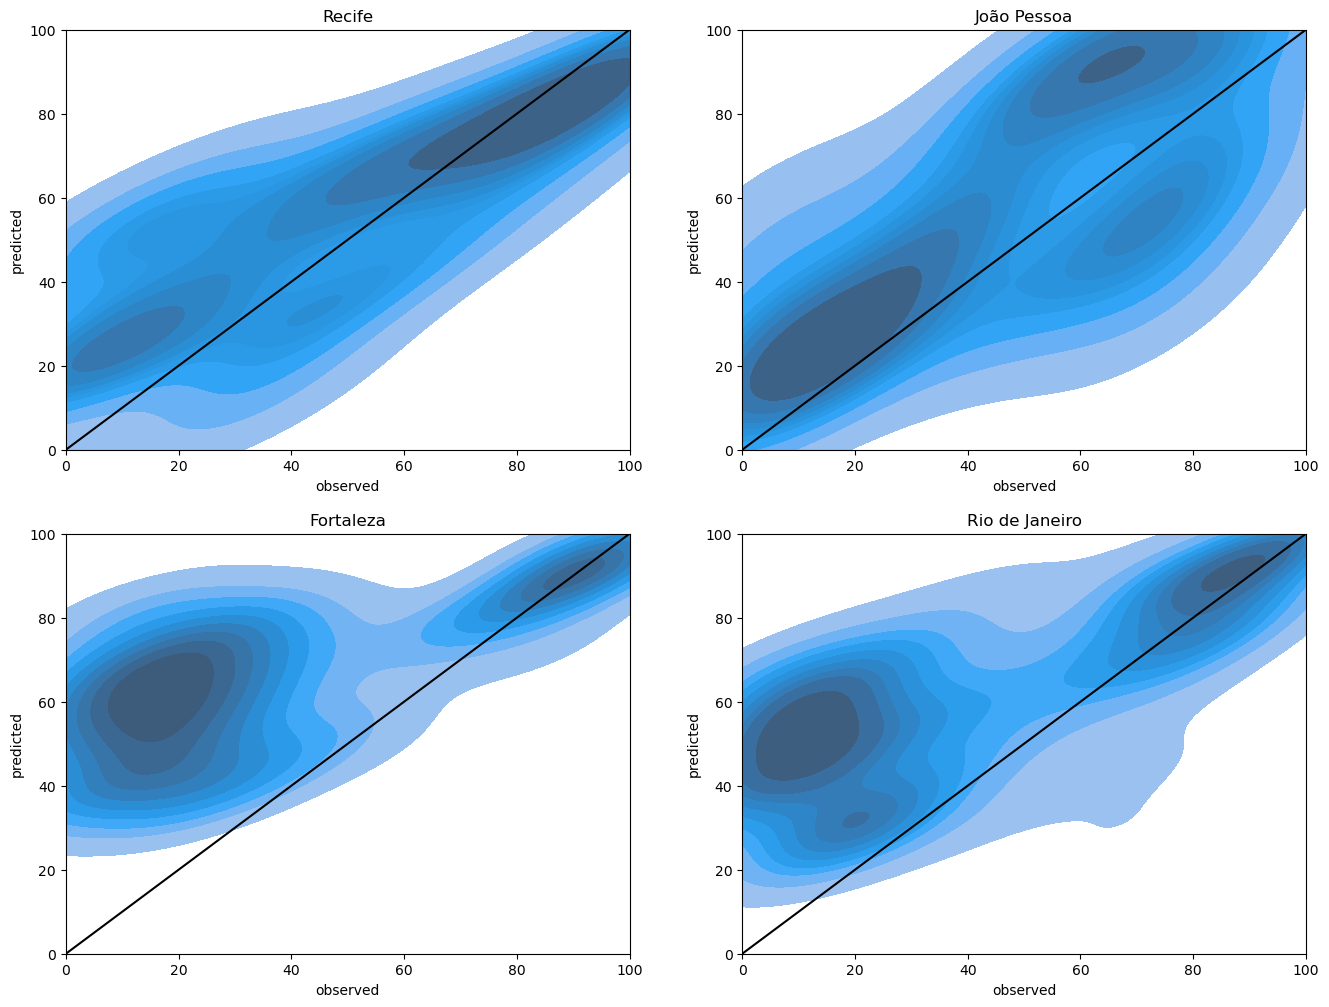

In [20]:
plot_qqplot_pgbm()

In [21]:
def plot_qqplot_bi_lstm():
    
    fig, axs = plt.subplots(2, 2, figsize=(16,12))
    
    city = 2611606
    city_name = 'Recife'
    doenca = 'chik'
    pw = 1
    with open(f'../predictions/lstm/lstm_{city}_chik_predictions_custom_msle_all.pkl', 'rb') as f:
            data = pickle.load(f)
            predicted = data['pred'][pw].values
            real = data['target'][:, pw]

    obs_preds = np.hstack((predicted, real))
    qp = [ss.percentileofscore(obs_preds, x) for x in predicted]
    qo = [ss.percentileofscore(obs_preds, x) for x in real]
    plot_cross_qq(axs[0,0], qo, qp)
    
    axs[0, 0].set_title(city_name)
    qp = np.array(qp)
    qo = np.array(qo)
    print(f"Predicted for {city_name} : ", np.median(qp - qo), np.percentile(qp - qo, 25), np.percentile(qp - qo, 75))

    city = 2507507
    city_name = 'João Pessoa'
    doenca = 'chik'
    pw = 1
    with open(f'../predictions/lstm/lstm_{city}_chik_predictions_custom_msle_all.pkl', 'rb') as f:
            data = pickle.load(f)
            predicted = data['pred'][pw].values
            real = data['target'][:, pw]

    obs_preds = np.hstack((predicted, real))
    qp = [ss.percentileofscore(obs_preds, x) for x in predicted]
    qo = [ss.percentileofscore(obs_preds, x) for x in real]
    plot_cross_qq(axs[0,1], qo, qp)
    
    axs[0, 1].set_title(city_name)
    
    qp = np.array(qp)
    qo = np.array(qo)
    print(f"Predicted for {city_name} : ", np.median(qp - qo), np.percentile(qp - qo, 25), np.percentile(qp - qo, 75))

    city = 2304400
    city_name = 'Fortaleza'
    doenca = 'chik'
    pw = 1
    with open(f'../predictions/lstm/lstm_{city}_chik_predictions_custom_msle_all.pkl', 'rb') as f:
            data = pickle.load(f)
            predicted = data['pred'][pw].values
            real = data['target'][:, pw]

    obs_preds = np.hstack((predicted, real))
    qp = [ss.percentileofscore(obs_preds, x) for x in predicted]
    qo = [ss.percentileofscore(obs_preds, x) for x in real]
    plot_cross_qq(axs[1,0], qo, qp)
    
    axs[1, 0].set_title(city_name)
    qp = np.array(qp)
    qo = np.array(qo)
    print(f"Predicted for {city_name} : ", np.median(qp - qo), np.percentile(qp - qo, 25), np.percentile(qp - qo, 75))

    city = 3304557
    city_name = 'Rio de Janeiro'
    doenca = 'chik'
    pw = 1
    with open(f'../predictions/lstm/lstm_{city}_chik_predictions_custom_msle_all.pkl', 'rb') as f:
            data = pickle.load(f)
            predicted = data['pred'][pw].values
            real = data['target'][:, pw]

    obs_preds = np.hstack((predicted, real))
    qp = [ss.percentileofscore(obs_preds, x) for x in predicted]
    qo = [ss.percentileofscore(obs_preds, x) for x in real]
    plot_cross_qq(axs[1,1], qo, qp)

    axs[1, 1].set_title(city_name)
    qp = np.array(qp)
    qo = np.array(qo)
    print(f"Predicted for {city_name} : ", np.median(qp - qo), np.percentile(qp - qo, 25), np.percentile(qp - qo, 75))

    fig.savefig(f'../figures/qqplot_bi_lstm.png',bbox_inches='tight', format = 'png', dpi = 300)
    
    return 


/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other argume

Predicted for Recife :  -7.7777777777777715 -14.444444444444443 3.3333333333333357
Predicted for João Pessoa :  -2.7777777777777786 -12.222222222222214 12.222222222222221
Predicted for Fortaleza :  36.25377643504532 20.619335347432024 47.129909365558916
Predicted for Rio de Janeiro :  -23.529411764705884 -37.86764705882353 -4.411764705882359


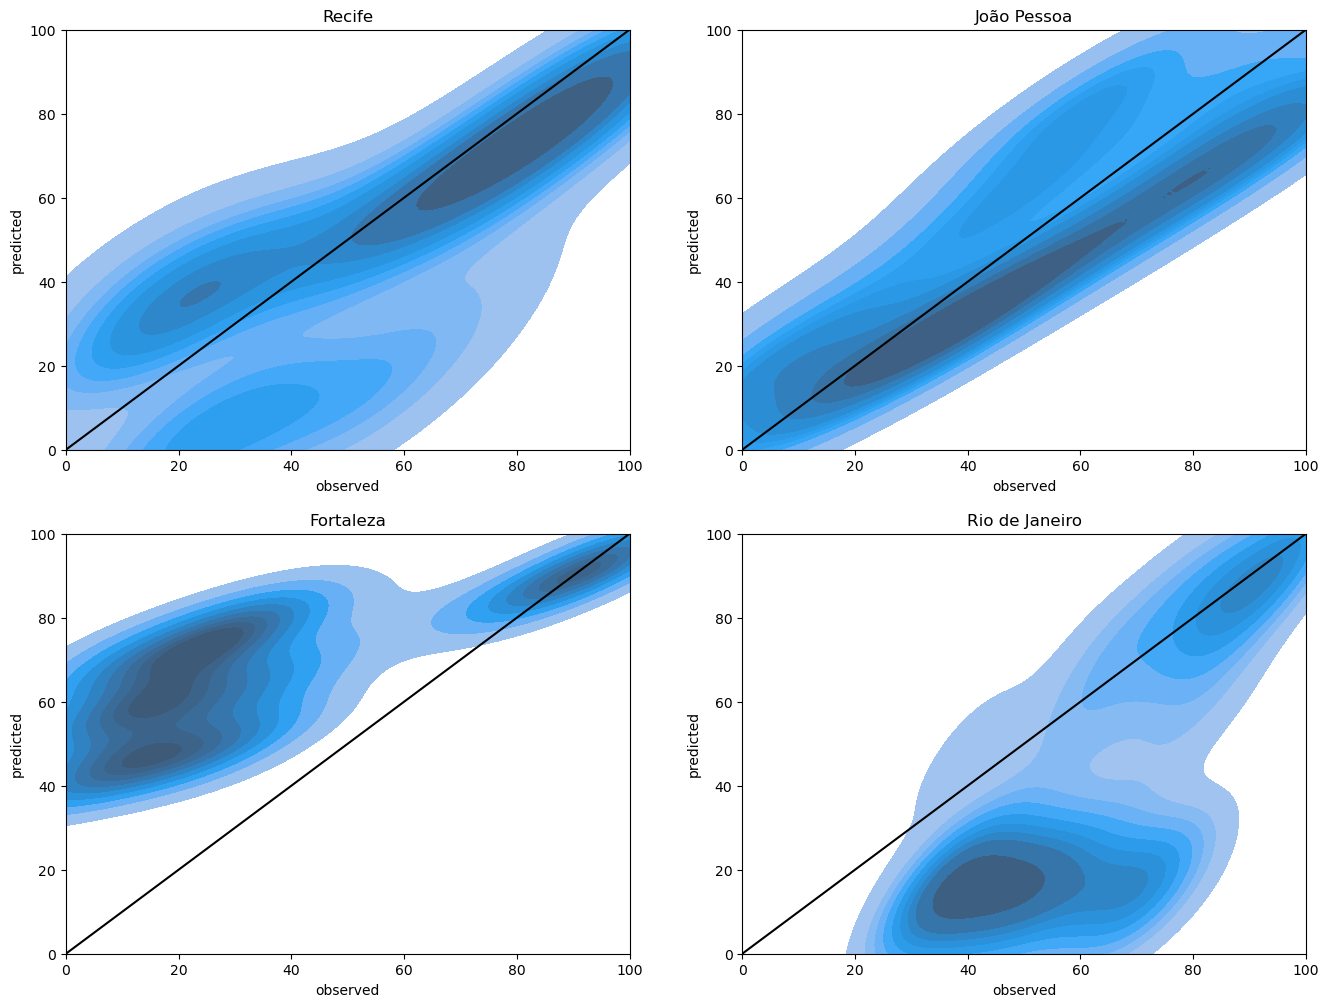

In [22]:
plot_qqplot_bi_lstm()

In [23]:
def plot_qqplot_bi_lstm_transfer():
    
    fig, axs = plt.subplots(2, 2, figsize=(16,12))
    
    city = 2611606
    city_name = 'Recife'
    doenca = 'chik'
    pw = 1
    label = 'transf_custom_msle'
    with open(f'../predictions/lstm/tl_{city}_{label}.pkl', 'rb') as f:
            data = pickle.load(f)
            predicted = data['pred'][pw].values[data['train_size']:]
            real = data['target'][:, pw][data['train_size']:]

    obs_preds = np.hstack((predicted, real))
    qp = [ss.percentileofscore(obs_preds, x) for x in predicted]
    qo = [ss.percentileofscore(obs_preds, x) for x in real]
    plot_cross_qq(axs[0,0], qo, qp)
    
    axs[0, 0].set_title(city_name)
    qp = np.array(qp)
    qo = np.array(qo)
    print(f"Predicted for {city_name} : ", np.median(qp - qo), np.percentile(qp - qo, 25), np.percentile(qp - qo, 75))

    city = 2507507
    city_name = 'João Pessoa'
    doenca = 'chik'
    pw = 1
    label = 'transf_custom_msle'
    with open(f'../predictions/lstm/tl_{city}_{label}.pkl', 'rb') as f:
            data = pickle.load(f)
            predicted = data['pred'][pw].values[data['train_size']:]
            real = data['target'][:, pw][data['train_size']:]

    obs_preds = np.hstack((predicted, real))
    qp = [ss.percentileofscore(obs_preds, x) for x in predicted]
    qo = [ss.percentileofscore(obs_preds, x) for x in real]
    plot_cross_qq(axs[0,1], qo, qp)
    
    axs[0, 1].set_title(city_name)
    
    qp = np.array(qp)
    qo = np.array(qo)
    print(f"Predicted for {city_name} : ", np.median(qp - qo), np.percentile(qp - qo, 25), np.percentile(qp - qo, 75))

    city = 2304400
    city_name = 'Fortaleza'
    doenca = 'chik'
    pw = 1
    label = 'transf_custom_msle'
    with open(f'../predictions/lstm/tl_{city}_{label}.pkl', 'rb') as f:
            data = pickle.load(f)
            predicted = data['pred'][pw].values[data['train_size']:]
            real = data['target'][:, pw][data['train_size']:]

    obs_preds = np.hstack((predicted, real))
    qp = [ss.percentileofscore(obs_preds, x) for x in predicted]
    qo = [ss.percentileofscore(obs_preds, x) for x in real]
    plot_cross_qq(axs[1,0], qo, qp)
    
    axs[1, 0].set_title(city_name)
    qp = np.array(qp)
    qo = np.array(qo)
    print(f"Predicted for {city_name} : ", np.median(qp - qo), np.percentile(qp - qo, 25), np.percentile(qp - qo, 75))

    city = 3304557
    city_name = 'Rio de Janeiro'
    doenca = 'chik'
    pw = 1
    label = 'transf_custom_msle'
    with open(f'../predictions/lstm/tl_{city}_{label}.pkl', 'rb') as f:
            data = pickle.load(f)
            predicted = data['pred'][pw].values[data['train_size']:]
            real = data['target'][:, pw][data['train_size']:]

    obs_preds = np.hstack((predicted, real))
    qp = [ss.percentileofscore(obs_preds, x) for x in predicted]
    qo = [ss.percentileofscore(obs_preds, x) for x in real]
    plot_cross_qq(axs[1,1], qo, qp)

    axs[1, 1].set_title(city_name)
    qp = np.array(qp)
    qo = np.array(qo)
    print(f"Predicted for {city_name} : ", np.median(qp - qo), np.percentile(qp - qo, 25), np.percentile(qp - qo, 75))

    fig.savefig(f'../figures/qqplot_bi_lstm_transfer.png',bbox_inches='tight', format = 'png', dpi = 300)
    
    return 

/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other argume

Predicted for Recife :  17.5 -2.9166666666666607 26.25
Predicted for João Pessoa :  -6.666666666666666 -20.208333333333336 26.041666666666664
Predicted for Fortaleza :  -27.145922746781117 -43.99141630901288 -3.648068669527902
Predicted for Rio de Janeiro :  27.541208791208796 11.60714285714286 42.68543956043956


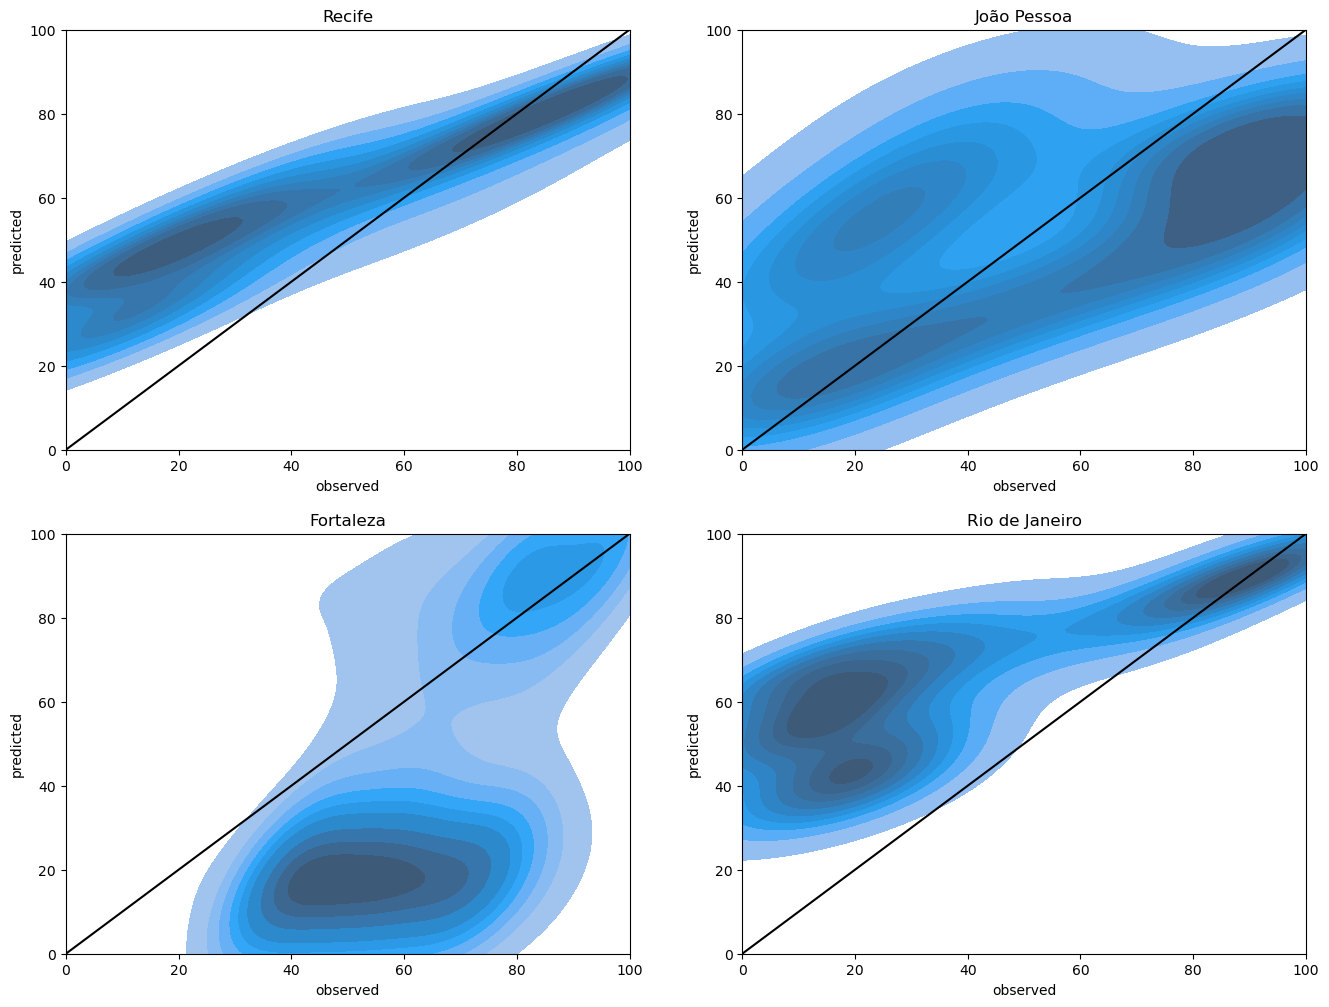

In [24]:
plot_qqplot_bi_lstm_transfer()

In [25]:
def plot_cross_preds_chik_pgbm(ax, city, title):
    
    
    data_transfer = pickle.load(open(f'../predictions/lstm/tl_{city}_transf_custom_msle.pkl', 'rb'))
    split_point = data_transfer['train_size'] 
    indice = data_transfer['indice']
    
    data_pgbm = pickle.load(open(f'../predictions/pgbm/pgbm_{city}_chik_cross_predictions.pkl', 'rb'))
    
    ydata = data_pgbm['target'] 
        
    ax.plot(ydata.loc[indice[split_point+7]:], 'k-', label='data')

    pred_window = 4
    
    x = data_pgbm['dates']
    y = data_pgbm['preds']
    y25 = data_pgbm['preds25']
    y975 = data_pgbm['preds975']
    
    split = x.index(pd.Timestamp(indice[split_point+7]))
    
    ax.plot(x[split:], y[split:], 'r-', alpha=0.5, label='median')
    ax.fill_between(x[split:], np.array(y25)[split:], np.array(y975)[split:], color='b', alpha=0.3)

    ax.grid()
    ax.legend()
    ax.set_title(title)
    ax.set_xlabel("time")
    ax.set_ylabel("incidence")
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    return


In [26]:
def plot_pgbm_bi_lstm_transfer_recife_jp():
    fig, axd = plt.subplot_mosaic([['a', 'b'],
                                  ['c', 'd']],
                              figsize=(12, 9), layout="constrained")
    
    city = 2611606
    city_name = 'Recife'
    plot_transf_chik_lstm(axd['a'], city, title = f"{city_name} (with transfer learning)")
    plot_cross_preds_chik_pgbm(axd['b'], city, title = f"{city_name}")
    
    city = 2507507
    city_name = 'João Pessoa'
    plot_transf_chik_lstm(axd['c'], city, title = f"{city_name} (with transfer learning)")
    plot_cross_preds_chik_pgbm(axd['d'], city, title = f"{city_name}")
    
    fig.savefig(f'../figures/pgbm_bi_lstm_transfer_recife_jp.png',bbox_inches='tight', format = 'png', dpi = 300)
    
    return  

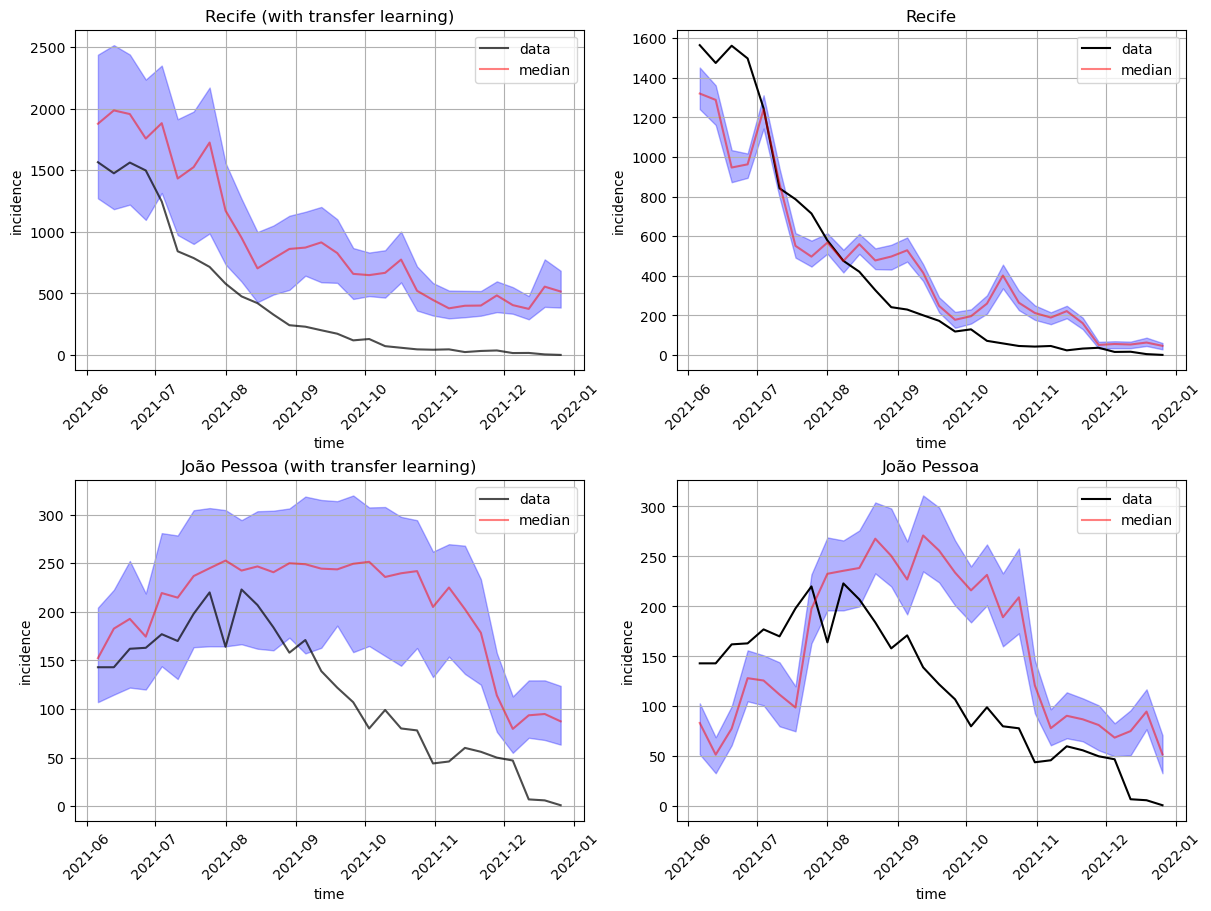

In [27]:
plot_pgbm_bi_lstm_transfer_recife_jp()

In [28]:
def plot_pgbm_bi_lstm_transfer_fortaleza():
    fig, axd = plt.subplot_mosaic([['a', 'b']],
                              figsize=(12, 4.5), layout="constrained")
    
    city = 2304400
    city_name = 'Fortaleza'
    plot_transf_chik_lstm(axd['a'], city, title = f"{city_name} (with transfer learning)")
    plot_cross_preds_chik_pgbm(axd['b'], city, title = f"{city_name}")
    
    fig.savefig(f'../figures/pgbm_bi_lstm_transfer_fortaleza.png',bbox_inches='tight', format = 'png', dpi = 300)
    
    return  

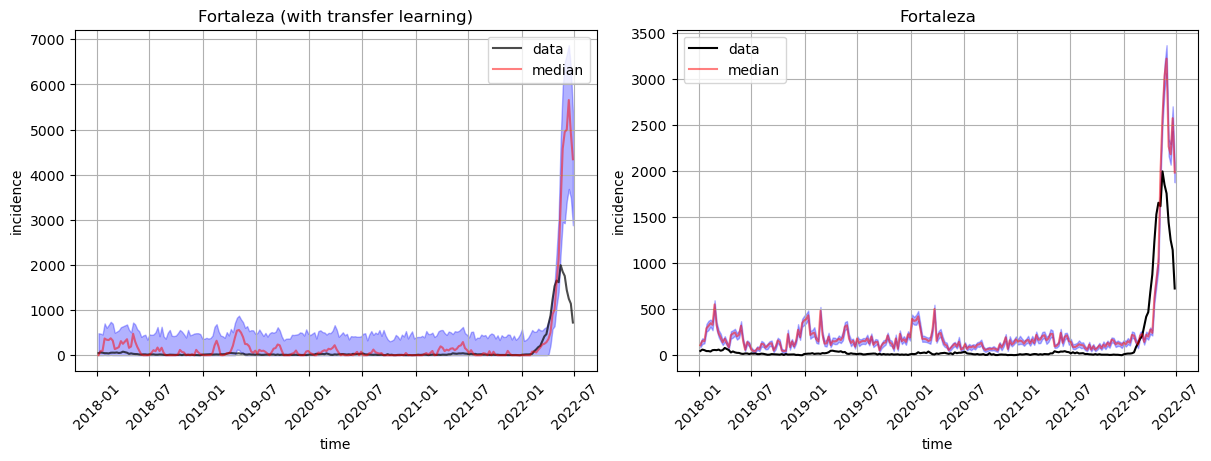

In [29]:
plot_pgbm_bi_lstm_transfer_fortaleza()

In [30]:
def plot_pgbm_bi_lstm_transfer_rio():
    fig, axd = plt.subplot_mosaic([['a', 'b']],
                              figsize=(12, 4.5), layout="constrained")
    
    city = 3304557
    city_name = 'Rio de Janeiro'
    plot_transf_chik_lstm(axd['a'], city, title = f"{city_name} (with transfer learning)")
    plot_cross_preds_chik_pgbm(axd['b'], city, title = f"{city_name}")
    
    fig.savefig(f'../figures/pgbm_bi_lstm_transfer_rio.png',bbox_inches='tight', format = 'png', dpi = 300)
    
    return  

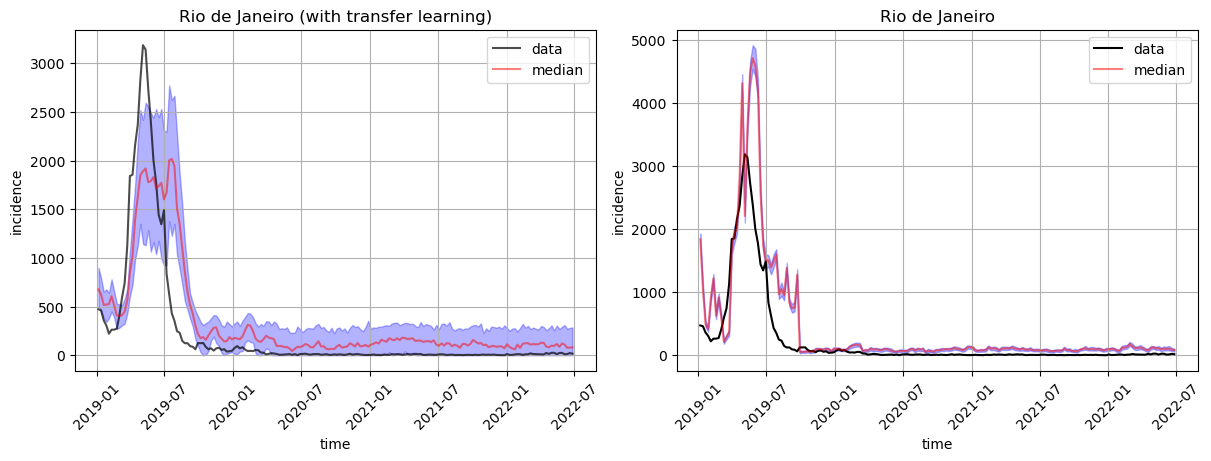

In [31]:
plot_pgbm_bi_lstm_transfer_rio()

In [32]:
def plot_comp(ax,city_name, data_nn, data_ml, data_tl, ini_evaluate, end_evaluate): 


    ini_index = data_nn['indice'].index(datetime.strptime(ini_evaluate, '%Y-%m-%d'))
    end_index = data_nn['indice'].index(datetime.strptime(end_evaluate, '%Y-%m-%d'))

    ax.plot(data_nn['indice'][ini_index:end_index], data_nn['target'][ini_index - 7: end_index - 7, -1] * data_nn['factor'] , color = 'black', label = 'Data', linewidth=2)

    ini_index_ml = data_ml['dates'].index(datetime.strptime(ini_evaluate, '%Y-%m-%d'))
    end_index_ml = data_ml['dates'].index(datetime.strptime(end_evaluate, '%Y-%m-%d'))

    ax.plot(data_ml['dates'][ini_index_ml:end_index_ml],data_ml['preds'][ini_index_ml: end_index_ml], label = 'PGBM', ls = 'dotted', linewidth=2)

    
    ax.plot(data_nn['indice'][ini_index:end_index],data_nn['pred'].iloc[ini_index - 7: end_index - 7,-1] * data_nn['factor'], label = 'Bi-LSTM', ls = 'dashed', linewidth=2)

    ax.plot(data_tl['indice'][ini_index:end_index], data_tl['pred'].iloc[ini_index - 7: end_index - 7,-1] * data_tl['factor'], label = f'Transfer', linewidth=2,
                        color = 'tab:red', ls = 'dashdot')


    ax.grid()
    ax.legend()
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
        
    ax.set_title(f'{city_name}')
        

In [33]:
def plot_comp_all():
    
    fig, axd = plt.subplot_mosaic([['a', 'b'],
                                  ['c', 'd']],
                              figsize=(12, 9), layout="constrained")
    
    CITY = 2611606
    CITY_NAME = 'Recife'
    
    with open(f'../predictions/lstm/lstm_{CITY}_chik_predictions_custom_msle_all.pkl', 'rb') as f:
        data_nn = pickle.load(f)
    
    doenca = 'dengue'
    with open(f'../predictions/pgbm/pgbm_{CITY}_chik_cross_predictions.pkl', 'rb') as f:
            data_ml = pickle.load(f)

    with open(f'../predictions/lstm/tl_{CITY}_transf_custom_msle.pkl', 'rb') as f:
            data_tl = pickle.load(f)
            
    ini_evaluate  = '2021-06-06'
    end_evaluate = f'2021-10-10'
    plot_comp(axd['a'],CITY_NAME, data_nn, data_ml, data_tl, ini_evaluate, end_evaluate)
    
    CITY = 3304557
    CITY_NAME = 'Rio de Janeiro'
    
    with open(f'../predictions/lstm/lstm_{CITY}_chik_predictions_custom_msle_all.pkl', 'rb') as f:
        data_nn = pickle.load(f)
    
    doenca = 'dengue'
    with open(f'../predictions/pgbm/pgbm_{CITY}_chik_cross_predictions.pkl', 'rb') as f:
            data_ml = pickle.load(f)

    with open(f'../predictions/lstm/tl_{CITY}_transf_custom_msle.pkl', 'rb') as f:
            data_tl = pickle.load(f)
            
    ini_evaluate  = '2019-01-06'
    end_evaluate = f'2019-05-05'
    
    plot_comp(axd['b'], CITY_NAME, data_nn, data_ml, data_tl, ini_evaluate, end_evaluate)
    
    CITY = 2507507
    CITY_NAME = 'João Pessoa'
    
    with open(f'../predictions/lstm/lstm_{CITY}_chik_predictions_custom_msle_all.pkl', 'rb') as f:
        data_nn = pickle.load(f)
    
    doenca = 'dengue'
    with open(f'../predictions/pgbm/pgbm_{CITY}_chik_cross_predictions.pkl', 'rb') as f:
            data_ml = pickle.load(f)

    with open(f'../predictions/lstm/tl_{CITY}_transf_custom_msle.pkl', 'rb') as f:
            data_tl = pickle.load(f)
            
    ini_evaluate = '2021-06-06'
    end_evaluate = '2021-10-10'

    plot_comp(axd['c'],CITY_NAME, data_nn, data_ml, data_tl, ini_evaluate, end_evaluate)
    
    CITY = 2304400
    CITY_NAME = 'Fortaleza'
    
    with open(f'../predictions/lstm/lstm_{CITY}_chik_predictions_custom_msle_all.pkl', 'rb') as f:
        data_nn = pickle.load(f)
    
    doenca = 'dengue'
    with open(f'../predictions/pgbm/pgbm_{CITY}_chik_cross_predictions.pkl', 'rb') as f:
            data_ml = pickle.load(f)

    with open(f'../predictions/lstm/tl_{CITY}_transf_custom_msle.pkl', 'rb') as f:
            data_tl = pickle.load(f)
            
    ini_evaluate = '2022-01-02'
    end_evaluate = '2022-05-08'
    plot_comp(axd['d'], CITY_NAME, data_nn, data_ml, data_tl, ini_evaluate, end_evaluate)
    
    plt.show()
    
    fig.savefig(f'../figures/comp_predictions.png',bbox_inches='tight', format = 'png', dpi = 300)
    
    return 

    
    

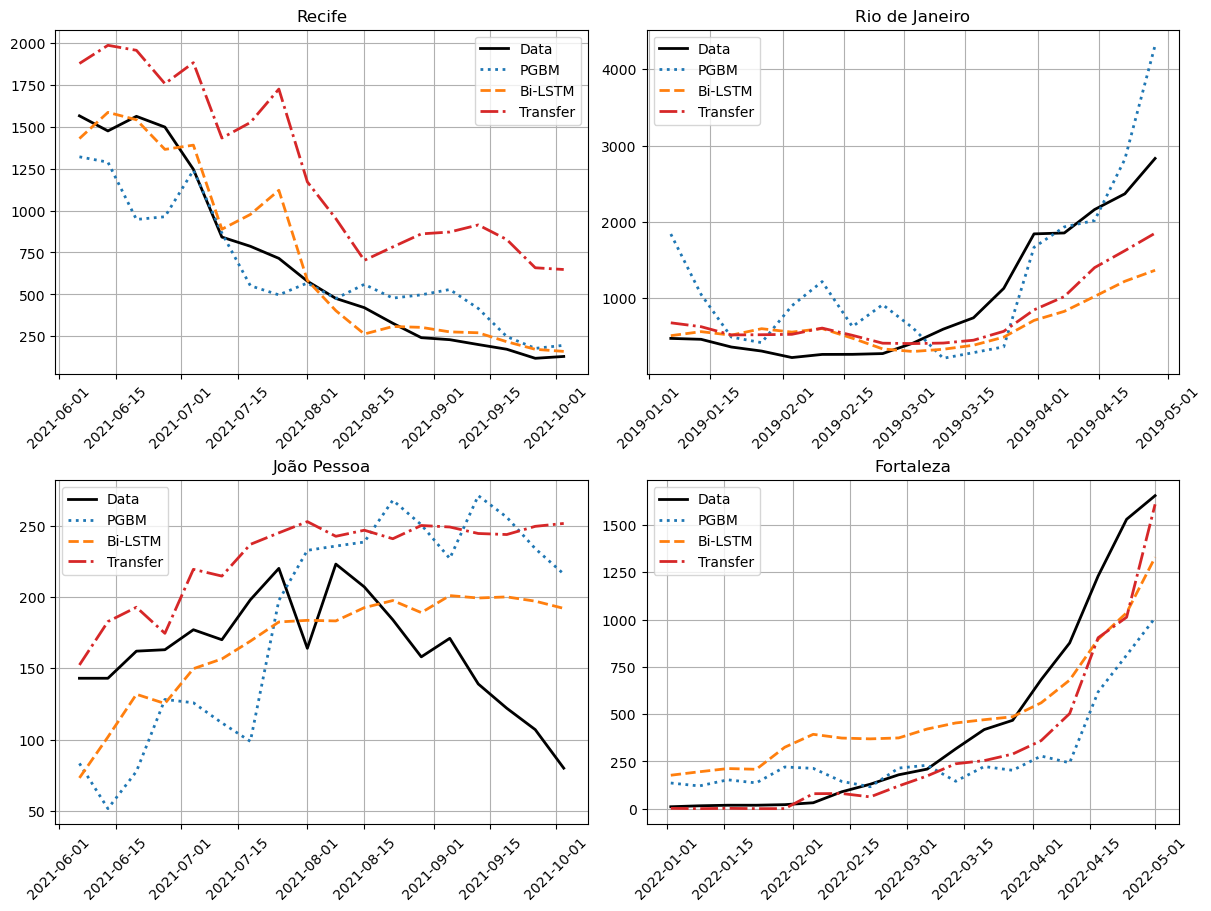

In [34]:
plot_comp_all()

In [35]:
def plot_comp_all_msle():
    
    fig, axd = plt.subplot_mosaic([['a', 'b'],
                                  ['c', 'd']],
                              figsize=(12, 9), layout="constrained")
    
    CITY = 2611606
    CITY_NAME = 'Recife'
    
    with open(f'../predictions/lstm/lstm_{CITY}_chik_predictions_msle_all.pkl', 'rb') as f:
        data_nn = pickle.load(f)
    
    doenca = 'dengue'
    with open(f'../predictions/pgbm/pgbm_{CITY}_chik_cross_predictions.pkl', 'rb') as f:
            data_ml = pickle.load(f)

    with open(f'../predictions/lstm/tl_{CITY}_transf_msle.pkl', 'rb') as f:
            data_tl = pickle.load(f)
            
    ini_evaluate  = '2021-06-06'
    end_evaluate = f'2021-10-10'
    plot_comp(axd['a'],CITY_NAME, data_nn, data_ml, data_tl, ini_evaluate, end_evaluate)
    
    CITY = 3304557
    CITY_NAME = 'Rio de Janeiro'
    
    with open(f'../predictions/lstm/lstm_{CITY}_chik_predictions_msle_all.pkl', 'rb') as f:
        data_nn = pickle.load(f)
    
    doenca = 'dengue'
    with open(f'../predictions/pgbm/pgbm_{CITY}_chik_cross_predictions.pkl', 'rb') as f:
            data_ml = pickle.load(f)

    with open(f'../predictions/lstm/tl_{CITY}_transf_msle.pkl', 'rb') as f:
            data_tl = pickle.load(f)
            
    ini_evaluate  = '2019-01-06'
    end_evaluate = f'2019-05-05'
    
    plot_comp(axd['b'], CITY_NAME, data_nn, data_ml, data_tl, ini_evaluate, end_evaluate)
    
    CITY = 2507507
    CITY_NAME = 'João Pessoa'
    
    with open(f'../predictions/lstm/lstm_{CITY}_chik_predictions_msle_all.pkl', 'rb') as f:
        data_nn = pickle.load(f)
    
    doenca = 'dengue'
    with open(f'../predictions/pgbm/pgbm_{CITY}_chik_cross_predictions.pkl', 'rb') as f:
            data_ml = pickle.load(f)

    with open(f'../predictions/lstm/tl_{CITY}_transf_msle.pkl', 'rb') as f:
            data_tl = pickle.load(f)
            
    ini_evaluate = '2021-06-06'
    end_evaluate = '2021-10-10'

    plot_comp(axd['c'],CITY_NAME, data_nn, data_ml, data_tl, ini_evaluate, end_evaluate)
    
    CITY = 2304400
    CITY_NAME = 'Fortaleza'
    
    with open(f'../predictions/lstm/lstm_{CITY}_chik_predictions_msle_all.pkl', 'rb') as f:
        data_nn = pickle.load(f)
    
    doenca = 'dengue'
    with open(f'../predictions/pgbm/pgbm_{CITY}_chik_cross_predictions.pkl', 'rb') as f:
            data_ml = pickle.load(f)

    with open(f'../predictions/lstm/tl_{CITY}_transf_msle.pkl', 'rb') as f:
            data_tl = pickle.load(f)
            
    ini_evaluate = '2022-01-02'
    end_evaluate = '2022-05-08'
    plot_comp(axd['d'], CITY_NAME, data_nn, data_ml, data_tl, ini_evaluate, end_evaluate)
    
    plt.show()
    
    fig.savefig(f'../figures/comp_predictions_msle.png',bbox_inches='tight', format = 'png', dpi = 300)
    
    return 

    

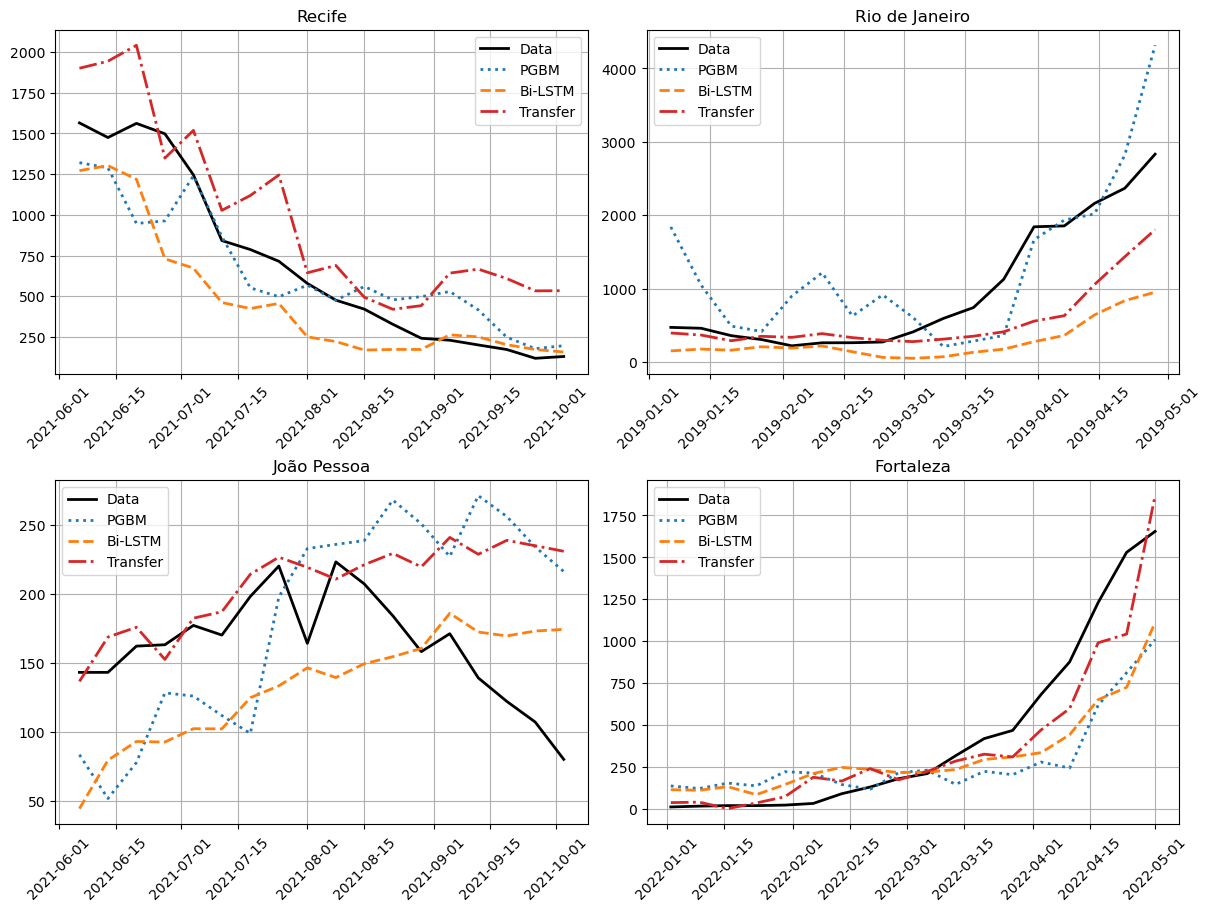

In [36]:
plot_comp_all_msle()